# Sentiment Analysis of Financial News Using NLTK

We have to predict the sentiment of fiancial news using nltk

#About Dataset

This dataset contains 2 csv file

cnbc headline   (3080, 3)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

reuters headline
1. time
2. headline
3. description


# What is NLTK ?

The Natural Language Toolkit (NLTK) is a platform used for building Python programs that work with human language data for applying in statistical natural language processing (NLP).

It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.


https://medium.com/@ODSC/intro-to-language-processing-with-the-nltk-59aa26b9d056



# What is sentiment analysis ?

Sentiment analysis is the process of detecting positive or negative sentiment in text. It’s often used by businesses to detect sentiment in social data, gauge brand reputation, and understand customers.



https://monkeylearn.com/sentiment-analysis/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import re
import string

#import stopwords and text processing libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
#import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Basic EDA on cnbc_headlines dataset

In [6]:
# Read csv file of cnbc headlines using pandas
cnbc_headlines = pd.read_csv("/content/cnbc_headlines.csv")

In [7]:
cnbc_headlines.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [8]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(3080, 3)

In [9]:
# Check all the columns in the cnbc headline dataset
cnbc_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [10]:
# Check which columns are having categorical, numerical or boolean values
cnbc_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [12]:
# Check for missing values in all the columnns of cnbc headline dataset
cnbc_headlines.isnull().sum()

Headlines      280
Time           280
Description    280
dtype: int64

There is 280 missing values in headlines, description and time

In [13]:
 # drop nan values in cnbc headline dataset
cnbc_headlines = cnbc_headlines.dropna()

In [14]:
# drop the duplicate rows in the dataset keep the first one
cnbc_headlines = cnbc_headlines.drop_duplicates(subset = ['Headlines', 'Description'], keep = 'first')
cnbc_headlines.reset_index(drop = True, inplace = True)
cnbc_headlines

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2785,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2786,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2787,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2788,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [15]:
# check the shape of cnbc headline dataset
cnbc_headlines.shape

(2790, 3)

# Basic EDA on reuters headlines

In [16]:
# Read csv file of reuters headlines using using pandas
reuters_headlines = pd.read_csv('/content/reuters_headlines.csv')

In [17]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [18]:
#check the shape of reuters headlines dataset
reuters_headlines.shape

(32770, 3)

In [19]:
#check the columns of reuters headline dataset
reuters_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [20]:
# Check which columns are having categorical, numerical or boolean values
reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [21]:
# Check for missing values in all the columnns of reuters headlines dataset
reuters_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [22]:
#drop the duplicate rows in reuters headlines dataset and keep the first one
reuters_headlines = reuters_headlines.drop_duplicates(subset = ['Headlines', 'Description'], keep = 'first')
reuters_headlines.reset_index(drop = True, inplace = True)
reuters_headlines

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#Making some functions that we will need  ahead

Preprocessing

1. **Lowercase** - It is necessary to convert the text to lower case as it is case sensitive.

2. **remove punctuations** -  The punctuations present in the text do not add value to the data. The punctuation, when attached to any word, will create a problem in differentiating with other words. so we have to get rid of them.

3. **remove stopwords** -  Stopwords include: I, he, she, and, but, was were, being, have, etc, which do not add meaning to the data. So these words must be removed which helps to reduce the features from our data. These are removed after tokenizing the text.

4. **stemming** -  A technique that takes the word to its root form. It just removes suffixes from the words. The stemmed word might not be part of the dictionary, i.e it will not necessarily give meaning.

5. **lemmatizing** -  Takes the word to its root form called Lemma. It helps to bring words to their dictionary form. It is applied to nouns by default. It is more accurate as it uses more informed analysis to create groups of words with similar meanings based on the context, so it is complex and takes more time. This is used where we need to retain the contextual information.


https://youtu.be/lMQzEk5vht4

https://www.pluralsight.com/guides/importance-of-text-pre-processing

In [38]:
# create a function for preprocessing
def preprocessing(text):
  #convert all to lowercase
  text = text.lower()

  #remove puntuations
  text = text.translate(str.maketrans("","" , string.punctuation))

  #remove stopword
  stop_word = set(stopwords.words('english'))
  text_tokens = word_tokenize(text)
  filter_words = [word for word in text_tokens if word not in stop_word]

  #stemming
  ps = PorterStemmer()
  stemmed_words = [ps.stem(w) for w in filter_words]

  #lemmitizing
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]

  return " ".join(lemma_words)



In [37]:
len(string.punctuation)

32

SENTIMENT ANAYSIS

https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664

In [24]:
# import sentiment intensity analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# create sentiment intensity analyzer object
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [26]:
#fuction to  decide sentiment as positive, negative and neutral
def get_analysis(score):
  if score < 0.0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'positive'

# Now working with description on datasets

In [27]:
# concatenate cnbc headlines dataset and reuters headline dataset
new_data = pd.concat([cnbc_headlines, reuters_headlines], axis = 0)

In [28]:
#check the shape of this new dataset
new_data.shape

(35463, 3)

In [29]:
#make a copy of new dataset
new_data_copy = new_data.copy()

In [39]:
# apply preprocessing to the description of new dataset
new_data['Description'] = new_data['Description'].apply(preprocessing)


In [40]:
# analyze polarity score of values in description and  add new column of it in dataset
ds_score =[]
for value in new_data['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])

new_data['ds_score'] = ds_score
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [41]:
# apply the function  which decides sentiment to  polarity score column
new_data['ds_score'] = new_data['ds_score'].apply(get_analysis)
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32668,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32669,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32670,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32671,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


<Axes: xlabel='ds_score', ylabel='count'>

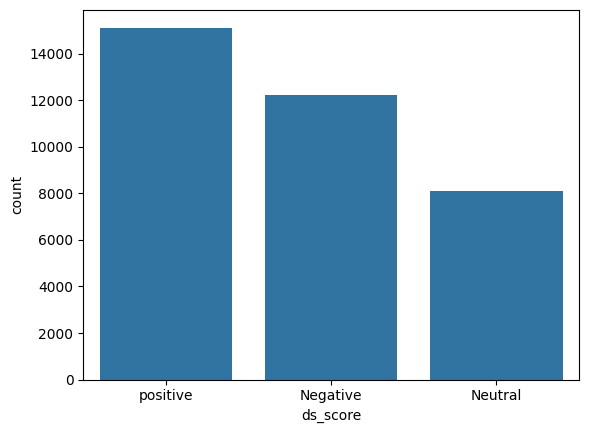

In [42]:
# plot a count plot on description score column
import seaborn as sns
sns.countplot(x='ds_score', data=new_data)

In the description

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [43]:
# pie chart on description score column
import plotly.express as px
fig = px.pie(new_data, names = 'ds_score', title = 'pie chart of different sentiments')
fig.show()

In the dataset

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description

In [44]:
# split the dataset  into test and train
# 90% train , 10% test and random state 212
x_train, x_test, y_train, y_test = train_test_split(new_data['Description'], new_data.ds_score, test_size =0.1, random_state = 212)

LINEAR SUPPORT VECTOR MACHINE


In [48]:
%%time
# pipeline creation
# 1. tfidVectorization
# 2. linearSVC model
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('model', LinearSVC())])


# Fit the pipeline to the data
linear_svc_model_ds = pipe.fit(x_train, y_train)
# predict on test dataset
prediction = linear_svc_model_ds.predict(x_test)
print('model - Linear SVC')

# print accuracy score
accuracy_lsvc_D = print('accuracy score: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
#print classification report
print(classification_report(y_test, prediction))


model - Linear SVC
accuracy score: 93.43
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 1.81 s, sys: 1.81 ms, total: 1.81 s
Wall time: 1.82 s


LOGISTIC REGRESSION


In [51]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer

# pipeline creation
# 1. CountVectorization
# 2. TfidTransformer
# 3. Logistic Regression
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

# fit the pipeline to the train data
log_model_ds = pipe.fit(x_train, y_train)

# predict on test dataset
prediction = log_model_ds.predict(x_test)
print('model - Logistic Regression')

#print accuracy
accuracy_log_D = print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))

#print confusion matrix
print(confusion_matrix(y_test, prediction))
# print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



model - Logistic Regression
accuracy: 89.51
[[1047   93   84]
 [  44  740   32]
 [  68   51 1388]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    positive       0.92      0.92      0.92      1507

    accuracy                           0.90      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.90      0.90      3547

CPU times: user 5.94 s, sys: 5.24 s, total: 11.2 s
Wall time: 7.52 s


MULTINOMIAL NAIVE BAYES


In [53]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. MultinomialNBv
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

# fit the pipeline to the train data
MultinomialNB_model_ds = pipe.fit(x_train, y_train)
#predict on test data
prediction = MultinomialNB_model_ds.predict(x_test)
print('Multinomial naive bayes')

#print accuracy
accuracy_MNB_D = print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
# print classification report
print(classification_report(y_test, prediction))

Multinomial naive bayes
accuracy: 62.31
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

CPU times: user 1.17 s, sys: 0 ns, total: 1.17 s
Wall time: 2.03 s


BERNOULLI NAIVE BAYES


In [54]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. BernoulliNB
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', BernoulliNB())])



# fit the pipeline to the train data
bernoulliNB_model_ds = pipe.fit(x_train, y_train)

#predict on test dataset
prediction  = bernoulliNB_model_ds.predict(x_test)
print('BERNOULLIS NAIVE BAYES')
#print accuracy
accuracy_BNB_D = print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))

# print classification report
print(classification_report(y_test, prediction))

BERNOULLIS NAIVE BAYES
accuracy: 73.61
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

CPU times: user 1.05 s, sys: 0 ns, total: 1.05 s
Wall time: 1.06 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [55]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5, random_state = 55))])

# Fit the pipeline to the data
GB_model_ds = pipe.fit(x_train, y_train)

# predict on test data
prediction = GB_model_ds.predict(x_test)
print('Gradienr boost')
#print accuracy
accuracy_GBC_D = print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))

#print confusion matrix
print(confusion_matrix(y_test, prediction))

# print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.



Gradienr boost
accuracy: 42.68
[[   9    0 1215]
 [   0    0  816]
 [   2    0 1505]]
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

CPU times: user 18.4 s, sys: 10.2 ms, total: 18.4 s
Wall time: 20.5 s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [66]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', XGBClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 10, max_depth = 5, random_state = 20))])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.unique(y_train))
y_train = le.transform(y_train)
y_test = le.transform(y_test)


# Fit the pipeline to the data
XGB_model_ds = pipe.fit(x_train, y_train)
# predict on test data
prediction = XGB_model_ds.predict(x_test)
print('XGBOOST')
#print accuracy
accuracy_XGB_D = print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
# print classification report
print(classification_report(y_test, prediction))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[06:29:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "loss" } are not used.




XGBOOST
accuracy: 49.62
[[ 289    1  934]
 [   2    0  814]
 [  36    0 1471]]
              precision    recall  f1-score   support

           0       0.88      0.24      0.37      1224
           1       0.00      0.00      0.00       816
           2       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

CPU times: user 19.4 s, sys: 161 ms, total: 19.6 s
Wall time: 12 s


DECISION TREE CLASSIFICATION MODEL


In [67]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. Decision tree classifier
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, splitter = 'best',random_state = 55))])



# Fit the pipeline to the data
DT_model_ds = pipe.fit(x_train, y_train)
# predict on test data
prediction = DT_model_ds.predict(x_test)
print('Decision Tree')
#print accuracy
accuracy_DT_D = print("accuracy: {} %".format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
# print classification report
print(classification_report(y_test, prediction))

Decision Tree
accuracy: 51.28 %
[[1089    1  134]
 [ 809    0    7]
 [ 777    0  730]]
              precision    recall  f1-score   support

           0       0.41      0.89      0.56      1224
           1       0.00      0.00      0.00       816
           2       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.42      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

CPU times: user 2.68 s, sys: 12.7 ms, total: 2.69 s
Wall time: 2.71 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [59]:
%%time
# pipeline creation
# 1. CountVectorizer
# 2. TfidTransformer
# 3. KNN classifier
pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', KNeighborsClassifier(n_neighbors = 10, weights = 'distance', algorithm = 'brute'))])



# Fit the pipeline to the data
KNN_model_ds = pipe.fit(x_train, y_train)
# predict on test data
prediction =KNN_model_ds.predict(x_test)
print('K Nearest Neighbor')
#print accuracy
print('accuracy: {}'.format(round(accuracy_score(y_test, prediction)*100, 2)))
#print confusion matrix
print(confusion_matrix(y_test, prediction))
# print classification report
print(classification_report(y_test, prediction))

K Nearest Neighbor
accuracy: 57.26
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 2min 5s, sys: 8.59 ms, total: 2min 5s
Wall time: 1min 16s


# working with test dataset

In [71]:
# Perforn the prediction on the test dataset
y_predicted = linear_svc_model_ds.predict(x_test)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'positive',
       'Neutral'], dtype=object)

In [72]:
# creating a dataframe of predicted results
predictions = pd.DataFrame(y_predicted)

In [73]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,positive


# Prediction

you can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

You can try more

In [74]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_ds.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [75]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_ds.predict(sent2)
y_predict

array(['positive'], dtype=object)

# Conclusion

We learn about NLTK, sentiment analysis in this project.

we conclude that using nltk it is easy to classify financial news and more we improve the traning data more we can get accurate
